# Climate Data Markup Language (CDML)

## Introduction

The Climate Data Markup Language (CDML) is the markup language used to represent metadata in CDMS. CDML is based on the W3C XML standard (https://www.w3.org). This chapter defines the syntax of CDML. Read this section if you will be building or maintaining a CDMS database.

XML, the eXtensible Markup Language, makes it possible to define interoperable dialects of markup languages. The most recent version of HTML, the Web hypertext markup language, is an XML dialect. CDML is also an XML dialect, geared toward the representation of gridded climate datasets. XML provides rigor to the metadata representation, ensuring that applications can access it correctly. XML also deals with internationalization issues, and holds forth the promise that utilities for browsing, editing, and other common tasks will be available in the future.

CDML files have the file extension .xml or .cdml.

### Elements

A CDML document consists of a nested collection of elements. An element is a description of the metadata associated with a CDMS object. The form of an element is:

<tag attribute-list> element-content </tag>

or

<tag attribute-list />

where

    tag is a string which defines the type of element

    attribute-list is a blank-separated list of attribute-value pairs, of the form:

    attribute = "value"

    element-content depends on the type of element. It is either a list of elements, or text which defines the element values. For example, the content of an axis element either is a list of axis values, or is a linear element.

    For datasets, the content is the blank-separated list of elements corresponding to the axes, grids, and variables contained in the dataset.

The CDML elements are:

In [ ]:
CDML Tags
Tag 	Description
attr 	Extra attribute
axis 	Coordinate axis
domain 	Axes on which a variable is defined
domElem 	Element of a variable domain
linear 	Linearly-spaced axis values
rectGrid 	Rectilinear Grid
variable 	Variable
6.3. Special Characters

XML reserves certain characters for markup. If they appear as content, they must be encoded to avoid confusion with markup:
6.3.1. Special Character Encodings
Character 	Encoding
< 	&lt;
> 	&gt;
& 	&amp;
“ 	&quot;
‘ 	&apos;

For example, the comment

Certain “special characters”, such as <, >, and ‘, must be encoded.

would appear in an attribute string as:

comment = “Certain &quot;special characters&quot;, such as &lt;, &gt;, and &apos;, must be encoded.”
6.4. Identifiers

In CDMS, all objects in a dataset have a unique string identifier. The id attribute holds the value of this identifier. If the variable, axis, or grid has a string name within a data file, then the id attribute ordinarily has this value. Alternatively, the name of the object in a data file can be stored in the name_in_file attribute, which can differ from the id. Datasets also have IDs, which can be used within a larger context (databases).

An identifer must start with an alphabetic character (upper or lower case), an underscore (_), or a colon (:). Characters after the first must be alphanumeric, an underscore, or colon. There is no restriction on the length of an identifier.
6.5. CF Metadata Standard

The CF metadata standard defines a set of conventions for usage of netCDF. This standard is supported by CDML. The document defines names and usage for metadata attributes. CF supersedes the GDT 1.3 standard.


CDML Syntax

The following notation is used in this section:

    A monospaced block is used for a syntax specification.
    Bold text indicates literals.
    (R|S) denotes either R or S.
    R* denotes zero or more R.
    R+ denotes one or more R.

A CDML document consists of a prolog followed by a single dataset element.

CDML-document ::= prolog dataset-element

The prolog defines the XML version, and the Document Type Definition (DTD), a formal specification of the document syntax. See https://www.w3.org/TR/1998/REC-xml-19980210 for a formal definition of XML

Version 1.0.

In [8]:
prolog ::= <?xml version="1.0"?> <!DOCTYPE dataset SYSTEM "https://www-pcmdi.llnl.gov/~drach/cdms/cdml.dtd">

SyntaxError: invalid syntax (<ipython-input-8-130c373f7254>, line 1)

In [20]:
Dataset Element

A dataset element describes a single dataset. The content is a list of elements corresponding to the axes, grids, and variables contained in the dataset. Axis, variable, and grid elements can be listed in any order, and an element ID can be used before the element is actually defined.

SyntaxError: invalid syntax (<ipython-input-20-4047fb6f67fd>, line 1)

In [9]:
dataset-element ::= <dataset dataset-attributes> dataset-content </dataset>

SyntaxError: invalid syntax (<ipython-input-9-aea7f2e4e3a8>, line 1)

In [10]:
dataset-content ::= (axis-element | grid-element | variable-element)* extra-attribute-element+

SyntaxError: invalid syntax (<ipython-input-10-9faa804948a9>, line 1)

Dataset Attributes
Attribute 	Required 	CF 	GDT 	Notes
appendices 	N 	N 	Y 	Version number
calendar 	N 	N 	Y 	

Calendar used for encoding time axes.

        gregorian | julian | noleap |360_day | proleptic_gregorian | standard

    Note: for the CF convention, the calendar attribute is placed on the time axis.

comment 	N 	Y 	Y 	Additional dataset information
conventions 	Y 	Y 	Y 	The netCDF metadata standard. Example: ‘CF-1.0’
cdms_filemap 	Y 	N 	N 	Map of partitioned axes to files. See note below.
directory 	N 	N 	N 	Root directory of the dataset
frequency 	N 	N 	N 	Temporal frequency
history 	N 	Y 	Y 	Evolution of the data
id 	Y 	N 	N 	Dataset identifier
institution 	N 	Y 	Y 	Who made or supplied the data
production 	N 	N 	Y 	How the data was produced (see source)
project 	N 	N 	N 	Project associated with the data Example: ‘CMIP 2’
references 	N 	Y 	N 	Published or web-based references that describe the data or methods used to produce it
source 	N 	Y 	N 	The method of production of the original data.
template 	N 	N 	N 	Filename template. This is an alternate mechanism, other than cdms_filemap, for describing the file mapping. See ‘cdimport -h’ for details.
title 	N 	Y 	N 	A succinct description of the data.

Notes:

The cdms_filemap attribute describes how the dataset is partitioned into files. The format is:

filemap ::= [ varmap, varmap, ...]
varmap ::= [ namelist, slicelist ]
namelist ::= [ name, name, ... ]
slicelist ::= [ indexlist, indexlist, ,,, ]
indexlist ::= [ time0, time1, lev0, lev1, path ]
name ::= variable name
time0 ::= first index of time in the file, or '-' if not split on time
time1 ::= last index of time + 1, in the file, or '-' if not split on time
lev0 ::= first index of vertical levels in the file, or '-' if not split on level
lev1 ::= last index +1 of vertical levels in the file, or '-' if not split on level
path ::= pathname of the file containing data for this time/level range.

The pathname is appended to the value of the directory attribute, to obtain an absolute pathname.


Axis Element

An axis element describes a single coordinate axis. The content can be a blank-separated list of axis values or a linear element. A linear element is a representation of a linearly-spaced axis as (start, delta, length).

axis-element ::= <axis axis-attributes> axis-content </axis>

axis-content ::= (axis-values | linear-element) extra-attribute-element*

axis-values ::= [value*]

linear-element ::= <linear delta= "value” length= “Integer“ start= “value“ > </linear>

Axis Elements
Attribute 	Required? 	CF 	GDT 	Notes
associate 	N 	N 	Y 	IDs of variables containing alternative sets of coordinates.
axis 	N 	Y 	Y 	

The spatial type of the axis:

        ‘T’ - time
        ‘X’ - longitude
        ‘Y’ - latitude
        ‘Z’ - vertical level
        ‘-‘ - not spatiotemporal

bounds 	N 	Y 	Y 	ID of the boundary variable
calendar 	N 	Y 	N 	See dataset.calendar
climatology 	N 	Y 	N 	Range of dates to which climatological statistics apply.
comment 	N 	Y 	N 	String comment
compress 	N 	Y 	Y 	Dimensions which have been compressed by gathering
datatype 	Y 	N 	N 	Char, Short, Long, Float, Double, or String
dates 	N 	Y 	N 	Range of dates to which statistics for a typical diurnal cycle apply.
expand 	N 	N 	Y 	Coordinates prior to contraction
formula_terms 	N 	Y 	N 	Variables that correspond to the terms in a formula.
id 	Y 	N 	N 	Axis identifier. Also the name of the axis in the underlying file(s), if name_in_file is undefined.
isvar 	N 	N 	N 	

‘true’ | ‘false’

        ‘false’ if the axis does not have coordinate values explicitly defined in the underlying file(s).
        Default: ‘true’

leap_month 	N 	Y 	N 	For a user-defined calendar, the month which is lengthened by a day in leap years.
leap_year 	N 	Y 	N 	An example of a leap year for a user-defined calendar. All years that differ from this year by a multiple of four are leap years.
length 	N 	N 	N 	Number of axis values, including values for which no data is defined. Cf. partition_length.
long_name 	N 	Y 	Y 	Long description of a physical quantity
modulo 	N 	N 	Y 	Arithmetic modulo of an axis with circular topology.
month_lengths 	N 	Y 	N 	Length of each month in a non-leap year for a user-defined calendar.
name_in_file 	N 	N 	N 	Name of the axis in the underlying file(s). See id.
partition 	N 	N 	N 	How the axis is split across files.
partition_length 	N 	N 	N 	Number of axis points for which data is actually defined. If data is missing for some values, this will be smaller than the length.
positive 	N 	Y 	Y 	Direction of positive for a vertical axis
standard_name 	N 	Y 	N 	Reference to an entry in the standard name table.
topology 	N 	N 	Y 	

Axis topology.

        ‘circular’ | ‘linear’

units 	Y 	Y 	Y 	Units of a physical quantity
weights 	N 	N 	N 	Name of the weights array

Partition attribute

For an axis in a dataset, the .partition attribute describes how an axis is split across files. It is a list of the start and end indices of each axis partition.

FIGURE 4. Partitioned axis

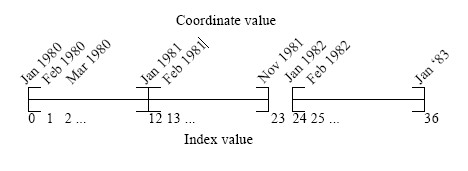

For example, Figure 4 shows a time axis, representing the 36 months, January 1980 through December 1982, with December 1981 missing. The first partition interval is (0,12), the second is (12,23), and the third is (24,36), where the interval (i,j) represents all indices k such that i <= k < j. The .partition attribute for this axis would be the list:

[0, 12, 12, 23, 24, 36]

Note that the end index of the second interval is strictly less than the start index of the following interval. This indicates that data for that period is missing.

Grid Element

A grid element describes a horizontal, latitude-longitude grid which is rectilinear in topology,

In [12]:
grid-element ::= <rectGrid grid-attributes> extra-attribute-element* </rectGrid>

SyntaxError: invalid syntax (<ipython-input-12-fb65ddd0f4b5>, line 1)

RectGrid Attributes

In [13]:
<th>Attribute</th> <th>Required?</th> <th>GDT?</th> <th>Notes</th>

<tr><td><code>id</code></td><td>Y</td><td>N</td><td>Grid identifier</td></tr>
<tr><td><code>type</code></td><td>Y</td><td>N</td><td><p>Grid classification</p><p>"gaussian" | "uniform"
| "equalarea" |"generic"</p><p>Default: "generic"</p></td></tr>
<tr><td><code>latitude</code></td><td>Y</td><td>N</td><td>Latitude axis name</td></tr>
<tr><td><code>longitude</code></td><td>Y</td><td>N</td><td>Longitude axis name</td></tr>
<tr><td><code>mask</code></td><td>N</td><td>N</td><td>Name of associated mask variable</td></tr>
<tr><td><code>order</code></td><td>Y</td><td>N</td><td><p>Grid ordering "yx"
 | "xy"</p><p>Default: “yx”, axis order is latitude, longitude</p></td></tr>



SyntaxError: invalid syntax (<ipython-input-13-ce3bc36b80f8>, line 1)

Variable Element

A variable element describes a data variable. The domain of the variable is an ordered list of domain elements naming the axes on which the variable is defined. A domain element is a reference to an axis or grid in the dataset.

The length of a domain element is the number of axis points for which data can be retrieved. The partition_length is the number of points for which data is actually defined. If data is missing, this is less than the length.

In [14]:
variable-element ::= <variable variable-attributes> variable-content </variable>

variable-content ::= variable-domain extra-attributeelement*`

variable-domain ::= <domain> domain-element* </domain>

domain-element ::= <domElem name=”axis-name”** start=”``Integer``” **length=**”``Integer``” **partition_length=**”``Integer``”/>**

SyntaxError: invalid syntax (<ipython-input-14-582909b45b93>, line 1)

Variable Attributes
Attribute 	Required? 	CF 	GDT 	Notes
id 	Y 	N 	N 	Variable identifier. Also, the name of the variable in the underlying file(s), if name_in_file is undefined.
ad_offset 	N 	Y 	Y 	Additive offset for packing data. See scale_factor.
associate 	N 	N 	Y 	IDs of variables containing alternative sets of coordinates Spatio-temporal dimensions.
axis 	N 	N 	Y 	Example: TYX for a variable with domain (time, latitude, longitude) Note: for CF, applies to axes only.
cell_methods 	N 	Y 	N 	The method used to derive data that represents cell values, e.g., maximum,mean,variance, etc.
comments 	N 	N 	N 	Comment string
coordinates 	N 	Y 	N 	IDs of variables containing coordinate data.
datatype 	Y 	N 	N 	Char, Short, Long, Float, Double, or String
grid_name 	N 	N 	N 	Id of the grid.
grid_type 	N 	N 	N 	gaussian, uniform, equalarea, generic
long_name 	N 	Y 	Y 	Long description of a physical quantity.
missing_value 	N 	Y 	Y 	Value used for data that are unknown or missing.
name_in_file 	N 	N 	N 	Name of the variable in the underlying file(s). See id.
scale_factor 	N 	Y 	Y 	Multiplicative factor for packing data. See add_offset.
standard_name 	N 	Y 	N 	Reference to an entry in the standard name table.
subgrid 	N 	N 	Y 	Records how data values represent subgrid variation.
template 	N 	N 	N 	Name of the file template to use for this variable. Overrides the dataset value.
units 	N 	Y 	Y 	Units of a physical quantity.
valid_max 	N 	Y 	Y 	Largest valid value of a variable.
valid_min 	N 	Y 	Y 	Smallest valid value of a variable.
valid_range 	N 	Y 	Y 	Largest and smallest valid values of a variable.

Attribute Element

Attributes which are not explicitly defined by the GDT convention are represented as extra attribute elements. Any dataset, axis, grid, or variable element can have an extra attribute as part of its content. This representation is also useful if the attribute value has non-blank whitespace characters (carriage returns, tabs, linefeeds) which are significant.

The datatype is one of: Char, Short, Long, Float, Double, or String.

In [15]:
extra-attribute-element ::= <attr name=”attribute-name” datatype=”attribute-datatype”> attribute-value </attr>

SyntaxError: invalid syntax (<ipython-input-15-fa800a037236>, line 1)

In [16]:
A Sample CDML Document

Dataset “sample” has two variables, and six axes.

Note:

    The file is indented for readability. This is not required; the added whitespace is ignored.
    The dataset contains three axes and two variables. Variables u and v are functions of time, latitude, and longitude.
    The global attribute cdms_filemap describes the mapping between variables and files. The entry [[u],[[0,1,-,-,u_2000.nc],[1,2,-,-,u_2001.nc],[2,3,,-,u_2002.nc] ] indicates that variable u is contained in file u_2000.nc for time index 0, u_2001.nc for time index 1, etc.

{% highlight xml %}

SyntaxError: invalid syntax (<ipython-input-16-608c9ddd230f>, line 1)

In [17]:
<!DOCTYPE dataset SYSTEM "http://www-pcmdi.llnl.gov/software/cdms/cdml.dtd">

SyntaxError: invalid syntax (<ipython-input-17-fa49388a05c2>, line 1)

In [18]:
[-90. -78. -66. -54. -42. -30. -18. -6. 6. 18. 30. 42. 54. 66. 78. 90.]


SyntaxError: invalid syntax (<ipython-input-18-36a544d26cf1>, line 1)

In [19]:
>>> <axis
>>>     id ="longitude"
>>>     length="32"
>>>     units="degrees_east"
>>>     datatype="Double"
>>> >
>>>
>>>     [ 0. 11.25 22.5 33.75 45. 56.25 67.5 78.75 90.
>>>
>>>     101.25 112.5 123.75 135. 146.25 157.5 168.75 180. 191.25
>>>
>>>     202.5 213.75 225. 236.25 247.5 258.75 270. 281.25 292.5
>>>
>>>     303.75 315. 326.25 337.5 348.75]
>>>     </axis>
>>>
>>> <axis
>>>     id ="time"
>>>     partition="[0 1 1 2 2 3]"
>>>     calendar="gregorian"
>>>     units="days since 2000-1-1"
>>>     datatype="Double"
>>>     length="3"
>>>     name_in_file="time"
>>> >
>>>
>>>    [ 0. 366. 731.]
>>> </axis>
>>>
>>> <variable
>>>    id ="u"
>>>    missing_value="-99.9"
>>>    units="m/s"
>>>    datatype="Double"
>>> >
>>>    <domain>
>>>        <domElem name="time" length="3" start="0"/>
>>>        <domElem name="latitude" length="16" start="0"/>
>>>        <domElem name="longitude" length="32" start="0"/>
>>>    </domain>
>>> </variable>
>>>
>>> <variable
>>>    id ="v"
>>>    missing_value="-99.9"
>>>    units="m/s"
>>>    datatype="Double"
>>> >
>>>    <domain>
>>>        <domElem name="time" length="3" start="0"/>
>>>        <domElem name="latitude" length="16" start="0"/>
>>>        <domElem name="longitude" length="32" start="0"/>
>>>    </domain>
>>> </variable>
>>>
>>> {% endhighlight %}


SyntaxError: invalid syntax (<ipython-input-19-09330e45a2f0>, line 1)